In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# using data augmentation to imporve the performance of our CNN model

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-08-17 08:41:02.358406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-17 08:41:02.358561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-17 08:41:02.493769: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/17408197905_829c4d7940_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/7166635566_ee240b5408_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/489506904_9b68ba211c.jpg'),
 PosixPath('datasets/flower_photos/tulips/17159349572_c0c51599f7_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8690791226_b1f015259f_n.jpg')]

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2960709681_e95940c0f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2414954629_3708a1a04d.jpg'),
 PosixPath('datasets/flower_photos/roses/6231418894_7946a7712b_n.jpg')]

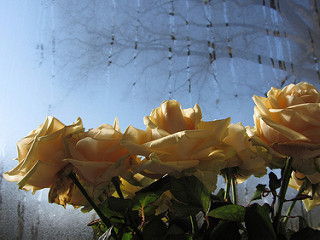

In [9]:
PIL.Image.open(str(roses[90]))

In [10]:
tulips=list(data_dir.glob('tulips/*'))
tulips[0:5]

[PosixPath('datasets/flower_photos/tulips/17408197905_829c4d7940_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/7166635566_ee240b5408_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/489506904_9b68ba211c.jpg'),
 PosixPath('datasets/flower_photos/tulips/17159349572_c0c51599f7_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8690791226_b1f015259f_n.jpg')]

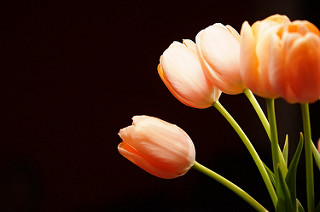

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[231]))

In [12]:
#let's now read the flowers as numpy arrays using opencv
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    }

In [13]:
flowers_labels_dict={
    'roses':0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [14]:
flowers_images_dict['roses'][0:5]

[PosixPath('datasets/flower_photos/roses/2960709681_e95940c0f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2414954629_3708a1a04d.jpg'),
 PosixPath('datasets/flower_photos/roses/6231418894_7946a7712b_n.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2960709681_e95940c0f0_n.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(252, 320, 3)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
x=[];y=[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
X = np.array(x)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10


2024-08-17 08:41:35.356502: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.65903, expected 1.97884
2024-08-17 08:41:35.356566: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.48014, expected 2.79995
2024-08-17 08:41:35.356576: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.27252, expected 3.59232
2024-08-17 08:41:35.356584: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.49599, expected 3.8158
2024-08-17 08:41:35.356592: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.91459, expected 3.2344
2024-08-17 08:41:35.356600: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.81327, expected 4.13307
2024-08-17 08:41:35.356608: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.54455, expected 4.86435
2024-08-17 08:41:35.356616: E external/local_xla/xla/serv

13/86 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2195 - loss: 2.5128

I0000 00:00:1723884098.800721      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3386 - loss: 1.8237
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5611 - loss: 1.0711
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6658 - loss: 0.8492
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7211 - loss: 0.7182
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8376 - loss: 0.4928
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9014 - loss: 0.2960
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9219 - loss: 0.2389
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9611 - loss: 0.1244
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9784 - loss: 0.0759
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9948 - loss: 0.0290


In [25]:
model.evaluate(X_test_scaled,y_test)

22/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5866 - loss: 1.9825

2024-08-17 08:41:52.460689: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.67824, expected 2.74465
2024-08-17 08:41:52.460751: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.39823, expected 4.46464
2024-08-17 08:41:52.460761: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 5.77088, expected 4.83729
2024-08-17 08:41:52.460769: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.66165, expected 3.72806
2024-08-17 08:41:52.460777: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.44429, expected 4.5107
2024-08-17 08:41:52.460804: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.62715, expected 4.69356
2024-08-17 08:41:52.460812: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.09563, expected 5.16204
2024-08-17 08:41:52.460820: E external/local_xla/xla/ser

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5905 - loss: 2.0110


[2.0893309116363525, 0.601307213306427]

In [26]:
from keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = Sequential(
    [
        RandomFlip("horizontal", input_shape=(180, 180, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
    ]
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


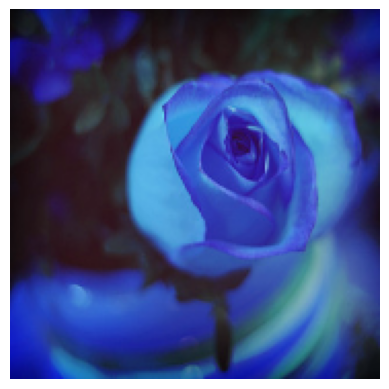

In [27]:
plt.axis('off')
plt.imshow(X[0])

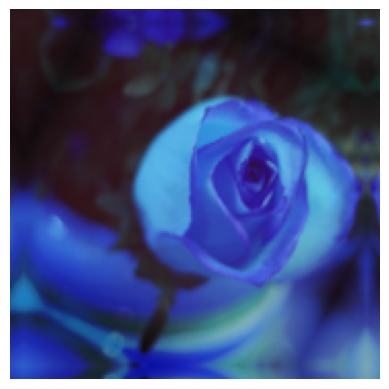

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [29]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


2024-08-17 08:42:00.540113: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3312 - loss: 1.5264
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5779 - loss: 1.0515
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6406 - loss: 0.9166
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6457 - loss: 0.9055
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6652 - loss: 0.8445
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6972 - loss: 0.7821
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7152 - loss: 0.7121
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7327 - loss: 0.7173
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7350 - loss: 0.6768
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7537 - loss: 0.6466
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7586 - loss: 0.6295
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7805 - l

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7027 - loss: 1.2076


[1.2242404222488403, 0.7058823704719543]